# Câu hỏi 1:

## Tình hình sản xuất và tiêu thụ khí gas ở các nước EU

Như trên các phương tiện thông tin đại chúng, ta thấy được rằng từ đầu đến giữa năm 2022, thông tin Nga ngừng cung cấp khí đốt cho các nước châu Âu đã khiến thế giời xôn xao. Liệu vì sao mà thông tin này lại quan trọng như vậy? Hãy cùng phân tích nhu cầu khí đốt ở các nước châu Âu để hiểu rõ hơn về chuyện này

Câu hỏi sẽ giải đáp được:
- Tình hình tiêu thụ và sản xuất điện năng của các nước châu Âu
- Liệu lượng khí đốt sản xuất có đủ cho tiêu thụ
- Các nước có phụ thuộc vào việc nhập khẩu khí đốt hay không

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
df = pd.read_csv("Europe.csv")
eu_df = df.drop(['quantity_footnotes'], axis=1)
eu_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates


### Thiết lập các hàm để hỗ trợ quá trình phân tích

In [2]:
#Hàm chọn dữ liệu theo đât nước
def select_country(countryname):
    country_data = eu_df[eu_df['country_or_area'].isin(countryname)].sort_values('year').reset_index()
    country_data.drop('index', axis=1, inplace=True)
    return country_data

In [3]:
#Hàm chọn dữ liệu theo category
def select_category(country_data, categoryname):
    category_country = country_data[country_data['category'].isin(categoryname)].sort_values('year').reset_index()
    category_country.drop('index', axis=1, inplace=True)
    return category_country

In [4]:
#Hàm chọn dữ liệu theo commodity_transaction
def select_commodity(category_country, commodityname):
    commodity_country = category_country[category_country['commodity_transaction'].isin(commodityname)].sort_values('year').reset_index()
    commodity_country.drop('index', axis=1, inplace=True )
    return commodity_country

### Đầu tiên ta tổng hợp về tổng lượng khí đốt tiêu thụ của các nước

In [5]:
gaswork_comsumption = select_commodity(eu_df,['Gasworks Gas - Final consumption'])
year = [i for i in range (2000,2015)]
consumption_by_year = {}
for i in year:
    consumption_by_year[str(i)] = gaswork_comsumption[gaswork_comsumption['year'] == i]['quantity'].sum().round(3)
print(consumption_by_year)

{'2000': 10187.0, '2001': 5699.0, '2002': 5463.0, '2003': 5804.0, '2004': 4747.0, '2005': 4789.0, '2006': 4505.0, '2007': 4213.0, '2008': 4580.0, '2009': 3328.0, '2010': 2949.0, '2011': 1279.0, '2012': 1104.0, '2013': 1246.0, '2014': 1073.0}


### Tổng hợp về lượng khí đốt sản xuất được

In [6]:
gaswork_production = select_commodity(eu_df,['Gasworks Gas - Production'])
production_by_year = {}
for i in year:
    production_by_year[str(i)] = gaswork_production[gaswork_production['year'] == i]['quantity'].sum().round(3)

### Trực quan hóa

In [7]:
year_list = []
consumption_list = []
production_list = []
for key, item in consumption_by_year.items():
    year_list.append(key)
    consumption_list.append(item)
for key, item in production_by_year.items():
    production_list.append(item)

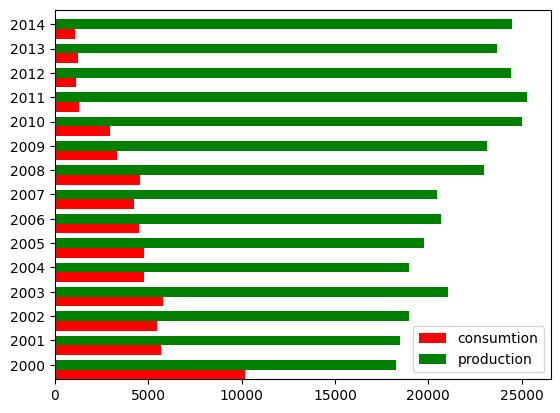

In [8]:
ind = np.arange(len(year_list))
width = 0.4
fig, ax = plt.subplots()

gas = pd.DataFrame(dict(graph=year_list,
                           n=consumption_list, m=production_list)) 

ax.barh(ind, gas.n, width, color='red', label='consumtion')
ax.barh(ind + width, gas.m, width, color='green', label='production')

ax.set(yticks=ind + width, yticklabels=gas.graph, ylim=[2*width - 1, len(gas)])
ax.legend()

## Nhận xét:
- Như ta đã thấy, lượng khí đốt sản xuất được của các nước chênh lệnh rất đáng kể so với lượng khí tiêu thụ được, điều này chứng minh cho việc các nước này chủ yếu xuất khẩu khí đốt và nhu cầu khí đốt không cao?
- Ta sẽ cũng làm rõ hơn bằng việc xem xét lượng xuất khẩu và nhập khẩu

In [9]:
gaswork_import = select_commodity(eu_df,['Gasworks Gas - Imports'])
year = [i for i in range (2000,2015)]
import_by_year = {}
for i in year:
    import_by_year[str(i)] = gaswork_import[gaswork_import['year'] == i]['quantity'].sum().round(3)

In [10]:
gaswork_export = select_commodity(eu_df,['Gasworks Gas - Exports'])
year = [i for i in range (2000,2015)]
export_by_year = {}
for i in year:
    export_by_year[str(i)] = gaswork_export[gaswork_export['year'] == i]['quantity'].sum().round(3)
print("Import:")
print(import_by_year)
print("Export:")
print(export_by_year)

Import:
{'2000': 0.0, '2001': 0.0, '2002': 0.0, '2003': 0.0, '2004': 0.0, '2005': 0.0, '2006': 0.0, '2007': 0.0, '2008': 0.0, '2009': 0.0, '2010': 0.0, '2011': 0.0, '2012': 0.0, '2013': 0.0, '2014': 0.0}
Export:
{'2000': 0.0, '2001': 0.0, '2002': 0.0, '2003': 0.0, '2004': 0.0, '2005': 0.0, '2006': 0.0, '2007': 0.0, '2008': 0.0, '2009': 0.0, '2010': 0.0, '2011': 0.0, '2012': 0.0, '2013': 0.0, '2014': 0.0}


Theo số liệu trên, không hề có bất kì lượng khí nào được xuất khẩu hay nhập khẩu cả.
Điều này khá vô lý
Để chắc chắn hơn ta kiểm tra xem trong dữ liệu có tồn tại dữ liệu xuất nhập khẩu hay không
Ta lọc dữ liệu ở mục gaswork

In [11]:
import_info = eu_df[eu_df['commodity_transaction'] == 'Gasworks Gas - Imports']
export_info = eu_df[eu_df['commodity_transaction'] == 'Gasworks Gas - Exports']
print('Import info')
import_info

Import info


,country_or_area,commodity_transaction,year,unit,quantity,category
148181,Poland,Gasworks Gas - Imports,1994,Terajoules,75.0,gasworks_gas
148182,Poland,Gasworks Gas - Imports,1993,Terajoules,183.0,gasworks_gas
148183,Poland,Gasworks Gas - Imports,1992,Terajoules,204.0,gasworks_gas
148184,Poland,Gasworks Gas - Imports,1991,Terajoules,213.0,gasworks_gas
148185,Poland,Gasworks Gas - Imports,1990,Terajoules,207.0,gasworks_gas


In [12]:
print('Export info')
export_info

Export info


,country_or_area,commodity_transaction,year,unit,quantity,category
147762,Germany,Gasworks Gas - Exports,1993,Terajoules,180.0,gasworks_gas
147763,Germany,Gasworks Gas - Exports,1992,Terajoules,198.0,gasworks_gas
147764,Germany,Gasworks Gas - Exports,1991,Terajoules,216.0,gasworks_gas


Ta thấy trong dữ liệu của gaswork có phần **import** và **export** nhưng kết quả tổng hợp qua từng năm lại bằng 0.
Điều này chứng minh theo như dữ liệu thì các quốc gia này không nhập khẩu hay xuất khẩu khí đốt trong suốt những năm 2000-2014.
Và trên đây ta thấy chỉ có dữ liệu xuất khẩu hay nhập khẩu của Đức và Ba Lan vào vài năm, điều này càng chứng minh tính chính xác của dữ liệu này.

## Nhận xét 2:
- Lượng khí đốt này không được xuất khẩu cũng không được tiêu thụ hết, vậy nó đi đâu?
- Đến đây ta chỉ có thể đi đến nghi vấn về sự xác thực của tập dữ liệu này là thiếu chính xác hoặc không đầy đủ